In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("./data/ESS1-9e01_1.csv")

In [3]:
df.shape

(40185, 53)

In [4]:
df.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'anweight',
       'ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff',
       'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl',
       'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr',
       'impenv', 'imptrad', 'impfun', 'acetalv', 'eimpcnt', 'gvrfgap',
       'imbleco', 'imdetbs', 'imdetmr', 'imtcjob', 'imwbcrm', 'lwdscwp',
       'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt', 'qfimedu', 'qfimlng',
       'qfimwht', 'qfimwsk', 'rfgbfml', 'rfgfrpc'],
      dtype='object')

In [5]:
df.essround.unique()

array([7])

In [6]:
df.describe()

,cedition,cseqno,essround,edition,idno,dweight,pspwght,pweight,anweight,ipcrtiv,...,noimbro,pplstrd,qfimchr,qfimcmt,qfimedu,qfimlng,qfimwht,qfimwsk,rfgbfml,rfgfrpc
count,40185.0,40185.000000,40185.0,4.018500e+04,4.018500e+04,40185.000000,40185.000000,40185.000000,40185.000000,40165.000000,...,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,40185.000000,0.0,0.0
mean,1.0,197579.282518,7.0,2.200000e+00,6.464965e+06,1.000000,1.000000,0.872549,0.872549,2.696452,...,100.764016,2.842603,5.085928,8.420107,7.468210,7.371980,3.722309,7.643399,NaN,NaN
std,0.0,111398.469971,0.0,4.440947e-16,2.301783e+07,0.365259,0.470060,0.912769,1.128717,1.515671,...,252.080313,1.267064,11.948526,9.495912,10.117159,8.441062,11.164303,9.506447,NaN,NaN
min,1.0,6919.000000,7.0,2.200000e+00,1.000000e+00,0.002272,0.002338,0.054012,0.000973,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.0,98308.000000,7.0,2.200000e+00,1.293000e+03,0.943731,0.721642,0.230129,0.196137,2.000000,...,10.000000,2.000000,0.000000,6.000000,5.000000,5.000000,0.000000,5.000000,NaN,NaN
50%,1.0,197392.000000,7.0,2.200000e+00,2.748000e+03,1.000000,0.929546,0.446609,0.415681,2.000000,...,20.000000,3.000000,3.000000,8.000000,7.000000,7.000000,1.000000,7.000000,NaN,NaN
75%,1.0,284215.000000,7.0,2.200000e+00,2.038200e+04,1.000067,1.188729,2.049104,1.115823,3.000000,...,35.000000,4.000000,6.000000,10.000000,8.000000,9.000000,5.000000,9.000000,NaN,NaN
max,1.0,396227.000000,7.0,2.200000e+00,1.000056e+08,4.000000,4.044253,2.796742,11.216700,9.000000,...,999.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,NaN,NaN


Note: I downloaded data for ESS Round 7, but rfgbfml "Granted refugees should be entitled to bring close family members" and rfgfrpc "Most refugee applicants not in real fear of persecution own countries" are only in Round 1 and Round 8.

In [7]:
codebook = pd.read_html("./data/codebook.html")

In [8]:
len(codebook)

65

In [9]:
# Look for tables with variable names
for index, i in enumerate(codebook):
    print(index, i[0][0])

0 Introduction
1 Disclaimer
2 Overview
3 Scope & Coverage
4 Producers
5 Sampling
6 Accessibility
7 File information
8 Group Administrative variables; country, identifications numbers, editions. Automatically included in data file.
9 Group Design, post-stratification and population weights. Automatically included in data file.
10 Group Human values scale
11 Group Immigration
12 cntry: Country
13 cname: Title of cumulative dataset
14 cedition: Edition of cumulative dataset
15 cproddat: Production date of cumulative dataset
16 cseqno: Respondent's sequence number in cumulative dataset
17 name: Title of dataset
18 essround: ESS round
19 edition: Edition
20 idno: Respondent's identification number
21 dweight: Design weight
22 pspwght: Post-stratification weight including design weight
23 pweight: Population size weight (must be combined with dweight or pspwght)
24 anweight: Analysis weight
25 ipcrtiv: Important to think new ideas and being creative
26 imprich: Important to be rich, have mon

In [10]:
# Check the shapes of variable tables
for index, i in enumerate(codebook[25:], start = 25):
    print(index, i.shape)

25 (14, 3)
26 (14, 3)
27 (14, 3)
28 (14, 3)
29 (14, 3)
30 (14, 3)
31 (14, 3)
32 (14, 3)
33 (14, 3)
34 (14, 3)
35 (14, 3)
36 (14, 3)
37 (14, 3)
38 (14, 3)
39 (14, 3)
40 (14, 3)
41 (14, 3)
42 (14, 3)
43 (14, 3)
44 (14, 3)
45 (14, 3)
46 (10, 3)
47 (12, 3)
48 (13, 3)
49 (18, 3)
50 (19, 3)
51 (19, 3)
52 (19, 3)
53 (18, 3)
54 (18, 3)
55 (7, 3)
56 (13, 3)
57 (19, 3)
58 (19, 3)
59 (19, 3)
60 (19, 3)
61 (19, 3)
62 (19, 3)
63 (13, 3)
64 (13, 3)


In [11]:
# Create a list of dictionaries
variables = []

In [12]:
for i in range(25,64):
    var= codebook[i][1][0]
    variables.append(var)


In [13]:
variables

['ipcrtiv: Important to think new ideas and being creative',
 'imprich: Important to be rich, have money and expensive things',
 'ipeqopt: Important that people are treated equally and have equal opportunities',
 'ipshabt: Important to show abilities and be admired',
 'impsafe: Important to live in secure and safe surroundings',
 'impdiff: Important to try new and different things in life',
 'ipfrule: Important to do what is told and follow rules',
 'ipudrst: Important to understand different people',
 'ipmodst: Important to be humble and modest, not draw attention',
 'ipgdtim: Important to have a good time',
 'impfree: Important to make own decisions and be free',
 'iphlppl: Important to help people and care for others well-being',
 'ipsuces: Important to be successful and that people recognise achievements',
 'ipstrgv: Important that government is strong and ensures safety',
 'ipadvnt: Important to seek adventures and have an exciting life',
 'ipbhprp: Important to behave properly',


In [14]:
df.columns

Index(['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'name', 'essround',
       'edition', 'idno', 'dweight', 'pspwght', 'pweight', 'anweight',
       'ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff',
       'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl',
       'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr',
       'impenv', 'imptrad', 'impfun', 'acetalv', 'eimpcnt', 'gvrfgap',
       'imbleco', 'imdetbs', 'imdetmr', 'imtcjob', 'imwbcrm', 'lwdscwp',
       'noimbro', 'pplstrd', 'qfimchr', 'qfimcmt', 'qfimedu', 'qfimlng',
       'qfimwht', 'qfimwsk', 'rfgbfml', 'rfgfrpc'],
      dtype='object')

In [15]:
# Keep columns we need
df = df[['cntry',
        'ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff',
       'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim', 'impfree', 'iphlppl',
       'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr',
       'impenv', 'imptrad', 'impfun',
        'eimpcnt', 'gvrfgap', 'imbleco', 'imdetbs', 'imdetmr','imtcjob',
        'imwbcrm', 'lwdscwp', 'pplstrd', 'qfimchr','qfimcmt',
        'qfimedu','qfimlng', 'qfimwht', 'qfimwsk']]

In [16]:
df = df.rename(columns={"eimpcnt":"allow_immigrants_poor","gvrfgap":"gov_refugee_generous",
                  "pplstrd":"better_ctry_share_tradition","imbleco":"take_more_from_taxes_than_put_in","imdetbs":"dont_mind_im_boss",
                    "imdetmr":"dont_mind_im_marry_family","imtcjob":"take_more_jobs_than_create",
                    "imwbcrm":"im_make_crime_worse", "lwdscwp":"law_against_discri_bad",
                    "qfimchr":"christianity_unimp", "qfimcmt":"commit_way_of_life_unimp",
                     "qfimedu":"good_edu_unimp","qfimlng":"speak_language_unimp",
                     "qfimwht":"white_unimp","qfimwsk":"work_skills_unimp",
                     "rfgbfml":"ref_can_bring_fam","rfgfrpc":"ref_not_in_fear"
                    })

In [17]:
df = df.rename(columns = {'ipcrtiv':"new_ideas_creative", "imprich":"rich",
                    "ipeqopt":"eq_treat_opp","ipshabt":"show_abilities_admired",
                    "impsafe":"live_safe_area","impdiff":"try_new_things",
                    "ipfrule":"follow_rules","ipudrst":"listen_understand_diff_ppl",
                    "ipmodst":"modest_humble_no_attention","ipgdtim":"good_time",
                    "impfree":"be_free_not_depend","iphlppl":"help_ppl_care_wellbeing",
                    "ipsuces":"success_achieve","ipstrgv":"gov_ensure_safety",
                    "ipadvnt":"adventure_take_risk","ipbhprp":"behave_proper",
                    "iprspot":"respect_from_ppl","iplylfr":"loyal_devote",
                    "impenv":"care_for_nature","imptrad":"follow_trad_cust",
                    "impfun":"fun_pleasure"})

In [18]:
df.columns

Index(['cntry', 'new_ideas_creative', 'rich', 'eq_treat_opp',
       'show_abilities_admired', 'live_safe_area', 'try_new_things',
       'follow_rules', 'listen_understand_diff_ppl',
       'modest_humble_no_attention', 'good_time', 'be_free_not_depend',
       'help_ppl_care_wellbeing', 'success_achieve', 'gov_ensure_safety',
       'adventure_take_risk', 'behave_proper', 'respect_from_ppl',
       'loyal_devote', 'care_for_nature', 'follow_trad_cust', 'fun_pleasure',
       'allow_immigrants_poor', 'gov_refugee_generous',
       'take_more_from_taxes_than_put_in', 'dont_mind_im_boss',
       'dont_mind_im_marry_family', 'take_more_jobs_than_create',
       'im_make_crime_worse', 'law_against_discri_bad',
       'better_ctry_share_tradition', 'christianity_unimp',
       'commit_way_of_life_unimp', 'good_edu_unimp', 'speak_language_unimp',
       'white_unimp', 'work_skills_unimp'],
      dtype='object')

In [19]:
values = ['new_ideas_creative', 'rich', 'eq_treat_opp',
       'show_abilities_admired', 'live_safe_area', 'try_new_things',
       'follow_rules', 'listen_understand_diff_ppl',
       'modest_humble_no_attention', 'good_time', 'be_free_not_depend',
       'help_ppl_care_wellbeing', 'success_achieve', 'gov_ensure_safety',
       'adventure_take_risk', 'behave_proper', 'respect_from_ppl',
       'loyal_devote', 'care_for_nature', 'follow_trad_cust', 'fun_pleasure']

In [20]:
immigration = ['allow_immigrants_poor', 'gov_refugee_generous',
       'take_more_from_taxes_than_put_in', 'dont_mind_im_boss',
       'dont_mind_im_marry_family', 'take_more_jobs_than_create',
       'im_make_crime_worse', 'law_against_discri_bad',
       'better_ctry_share_tradition', 'christianity_unimp',
       'commit_way_of_life_unimp', 'good_edu_unimp', 'speak_language_unimp',
       'white_unimp', 'work_skills_unimp']

In [21]:
features = ['new_ideas_creative', 'rich', 'eq_treat_opp',
       'show_abilities_admired', 'live_safe_area', 'try_new_things',
       'follow_rules', 'listen_understand_diff_ppl',
       'modest_humble_no_attention', 'good_time', 'be_free_not_depend',
       'help_ppl_care_wellbeing', 'success_achieve', 'gov_ensure_safety',
       'adventure_take_risk', 'behave_proper', 'respect_from_ppl',
       'loyal_devote', 'care_for_nature', 'follow_trad_cust', 'fun_pleasure',
       'allow_immigrants_poor', 'gov_refugee_generous',
       'take_more_from_taxes_than_put_in', 'dont_mind_im_boss',
       'dont_mind_im_marry_family', 'take_more_jobs_than_create',
       'im_make_crime_worse', 'law_against_discri_bad',
       'better_ctry_share_tradition', 'christianity_unimp',
       'commit_way_of_life_unimp', 'good_edu_unimp', 'speak_language_unimp',
       'white_unimp', 'work_skills_unimp']

# Summary

In [22]:
df.dtypes

cntry                                object
new_ideas_creative                  float64
rich                                float64
eq_treat_opp                        float64
show_abilities_admired              float64
live_safe_area                      float64
try_new_things                      float64
follow_rules                        float64
listen_understand_diff_ppl          float64
modest_humble_no_attention          float64
good_time                           float64
be_free_not_depend                  float64
help_ppl_care_wellbeing             float64
success_achieve                     float64
gov_ensure_safety                   float64
adventure_take_risk                 float64
behave_proper                       float64
respect_from_ppl                    float64
loyal_devote                        float64
care_for_nature                     float64
follow_trad_cust                    float64
fun_pleasure                        float64
allow_immigrants_poor           

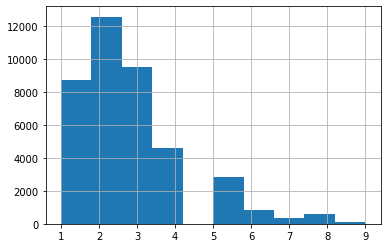

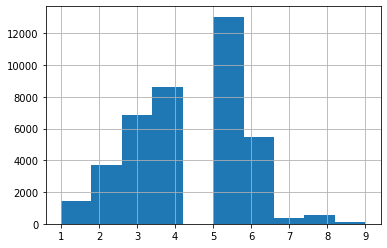

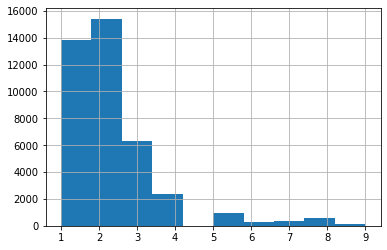

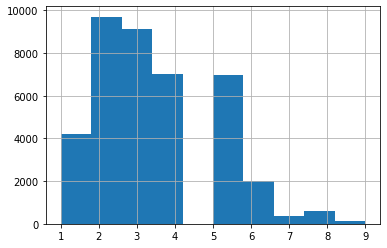

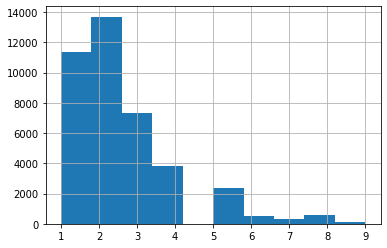

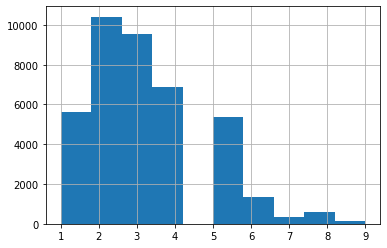

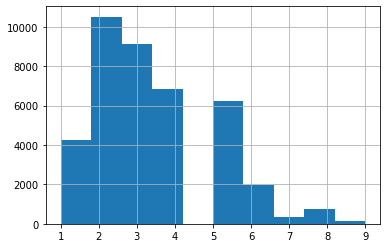

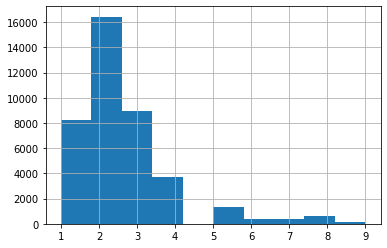

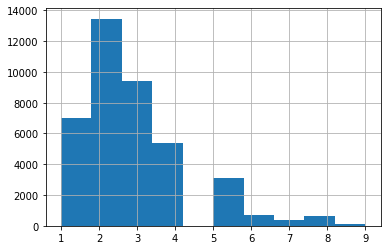

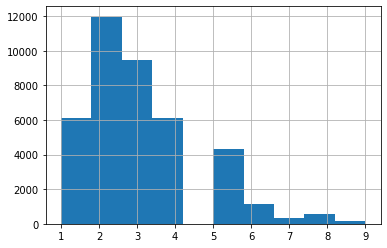

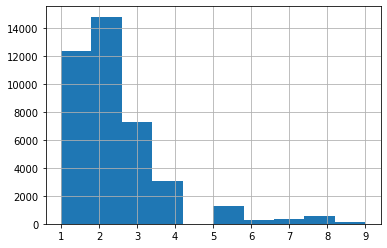

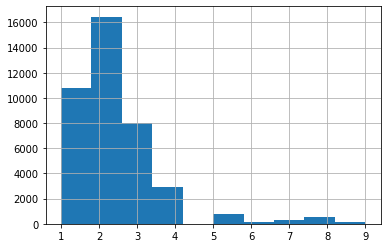

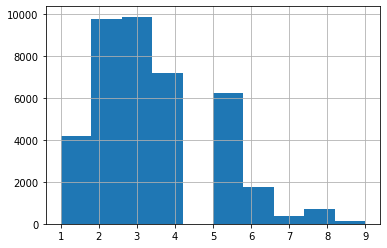

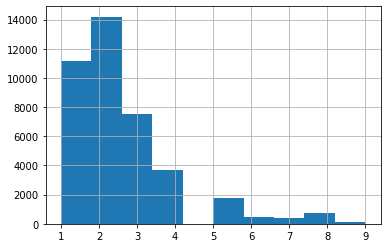

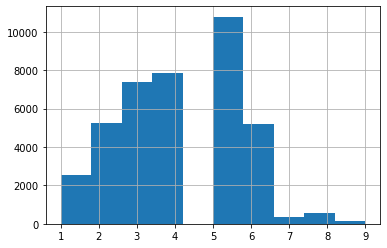

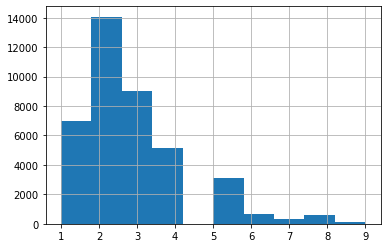

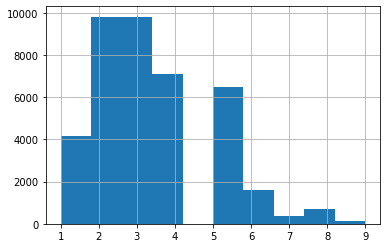

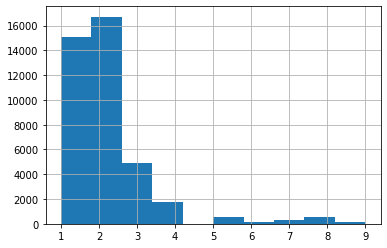

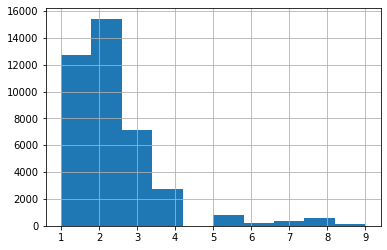

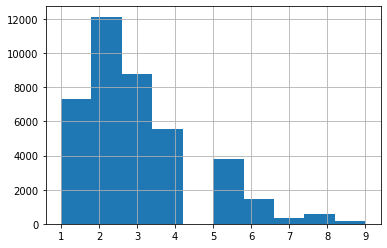

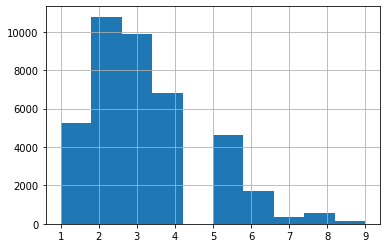

In [23]:
for feature in values:
    df[feature].hist(bins=10)
    plt.show()

In [24]:
# Get group of columns based on max value
max_9 = df.loc[:, list(df.max()==9)].columns
max_99 = df.loc[:, list(df.max()==99)].columns
max_999 = df.loc[:, list(df.max()==999)].columns


In [25]:
# # 7 means refusal, 8 means don't know, 9 means missing
df[max_999] =df[max_999].replace([777,888,999], np.NaN)
df[max_99] =df[max_99].replace([77,88,99], np.NaN)
df[max_9] =df[max_9].replace([7,8,9], np.NaN)


In [26]:
df.isnull().sum()


cntry                                  0
new_ideas_creative                  1099
rich                                1041
eq_treat_opp                        1070
show_abilities_admired              1119
live_safe_area                      1065
try_new_things                      1082
follow_rules                        1237
listen_understand_diff_ppl          1118
modest_humble_no_attention          1120
good_time                           1092
be_free_not_depend                  1071
help_ppl_care_wellbeing             1045
success_achieve                     1181
gov_ensure_safety                   1291
adventure_take_risk                 1106
behave_proper                       1148
respect_from_ppl                    1224
loyal_devote                        1064
care_for_nature                     1066
follow_trad_cust                    1112
fun_pleasure                        1115
allow_immigrants_poor               3217
gov_refugee_generous                1288
take_more_from_t

In [27]:
df = df.dropna()

In [28]:
df.cntry.unique()

array(['BE', 'CH', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'HU', 'IE',
       'IL', 'LT', 'NL', 'NO', 'PL', 'PT', 'SE', 'SI'], dtype=object)

In [29]:
df = df.loc[df.cntry=="HU"]

In [30]:
df = df[features]

In [31]:
scaler = StandardScaler()

In [32]:
df_std =  pd.DataFrame(scaler.fit_transform(df),
                  columns=features)

In [33]:
df[max_9]

,new_ideas_creative,rich,eq_treat_opp,show_abilities_admired,live_safe_area,try_new_things,follow_rules,listen_understand_diff_ppl,modest_humble_no_attention,good_time,...,adventure_take_risk,behave_proper,respect_from_ppl,loyal_devote,care_for_nature,follow_trad_cust,fun_pleasure,allow_immigrants_poor,gov_refugee_generous,better_ctry_share_tradition
22037,3.0,5.0,2.0,2.0,1.0,3.0,5.0,3.0,3.0,2.0,...,4.0,4.0,3.0,1.0,2.0,3.0,3.0,3.0,4.0,3.0
22038,1.0,3.0,1.0,1.0,2.0,2.0,4.0,1.0,2.0,1.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0
22039,3.0,4.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,2.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0
22044,2.0,6.0,2.0,3.0,2.0,2.0,6.0,3.0,2.0,3.0,...,1.0,6.0,6.0,3.0,2.0,2.0,1.0,3.0,3.0,4.0
22045,1.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,4.0,4.0,3.0,1.0,1.0,1.0,1.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23726,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,4.0,2.0
23727,4.0,3.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,3.0,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0
23728,4.0,2.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,2.0
23730,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,...,3.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,3.0


# PCA

In [34]:
## Instantiate model object
pca = PCA(n_components=5)

In [35]:
## Fit model
mod = pca.fit(df_std)

In [36]:
# Get loadings with items
pd.DataFrame(mod.components_.T,
            index=df_std.columns).style.background_gradient(cmap='seismic')

,0,1,2,3,4
new_ideas_creative,0.189947,-0.123658,0.224758,-0.029931,-0.147959
rich,0.142469,-0.017696,0.387731,-0.020542,0.045760
eq_treat_opp,0.207915,-0.057803,-0.099365,-0.016517,-0.103488
show_abilities_admired,0.248941,-0.087872,0.202390,-0.027289,-0.116758
live_safe_area,0.238012,-0.017296,-0.235852,-0.062418,-0.173501
try_new_things,0.210093,-0.107341,0.237886,0.007676,-0.035707
follow_rules,0.132006,0.018898,0.062006,0.150736,0.434757
listen_understand_diff_ppl,0.213097,-0.114832,-0.044498,0.072347,0.189800
modest_humble_no_attention,0.147002,-0.035683,-0.257845,0.104364,0.346849
good_time,0.245478,-0.059308,0.182497,-0.055790,-0.045072


In [37]:
## Get % of variance explained by each component
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3","PC4","PC5"]).T

,PC1,PC2,PC3,PC4,PC5
0,17.0,13.0,8.0,6.0,5.0


In [38]:
## Get cumulative variance explained by 3 components
pd.DataFrame(np.round(mod.explained_variance_ratio_, 2)*100,
            index=["PC1", "PC2", "PC3","PC4","PC5"]).T.sum(axis=1)

0    49.0
dtype: float64

In [39]:
## View PCs and loadings and give PCs sensible labels for interpretation, add color for clarity
pd.DataFrame(mod.components_.T,
            index=df_std.columns,
            columns=["PC1",
                    "PC2",
                    "PC3",
                    "PC4",
                    "PC5"]).sort_values(by="PC1",ascending=False).style.background_gradient(cmap='seismic')

,PC1,PC2,PC3,PC4,PC5
show_abilities_admired,0.248941,-0.087872,0.202390,-0.027289,-0.116758
care_for_nature,0.245534,-0.041244,-0.269688,-0.036230,-0.126978
good_time,0.245478,-0.059308,0.182497,-0.055790,-0.045072
be_free_not_depend,0.244311,-0.085180,-0.025048,-0.072058,-0.111896
loyal_devote,0.242978,-0.036110,-0.237880,-0.085606,-0.078687
fun_pleasure,0.240489,-0.064819,0.030511,-0.046823,-0.125098
live_safe_area,0.238012,-0.017296,-0.235852,-0.062418,-0.173501
gov_ensure_safety,0.229061,0.014240,-0.153544,-0.084692,-0.110952
help_ppl_care_wellbeing,0.227801,-0.102011,-0.108472,0.028442,0.113314
respect_from_ppl,0.226526,0.023886,0.036048,-0.008747,0.187786


#Hyperparameter

In [40]:
## Instantiate model object
pca = PCA(n_components=0.85,
         svd_solver="full")

In [44]:
## Fit model
mod = pca.fit(df)

In [45]:
mod.explained_variance_ratio_

array([0.25544631, 0.10559407, 0.07859474, 0.07287249, 0.05789198,
       0.05727335, 0.0437254 , 0.03769817, 0.03205899, 0.02459123,
       0.02435787, 0.01948859, 0.01633393, 0.01578853, 0.01460301])